# Collaborative Recommder System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
data = pd.read_csv('Movie.csv')
print(data.shape)
data.head()

(8992, 3)


,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [4]:
data.sort_values('userId')

,userId,movie,rating
2569,1,Jumanji (1995),3.5
3724,2,Grumpier Old Men (1995),4.0
0,3,Toy Story (1995),4.0
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0
...,...,...,...
6463,7117,Heat (1995),5.0
2567,7119,Toy Story (1995),5.0
2568,7120,Toy Story (1995),4.5
3723,7120,Jumanji (1995),4.0


In [4]:
data.value_counts()

userId  movie                               rating
1       Jumanji (1995)                      3.5       1
4636    Toy Story (1995)                    5.0       1
4634    GoldenEye (1995)                    4.5       1
        Jumanji (1995)                      3.0       1
        Toy Story (1995)                    3.0       1
                                                     ..
2361    Toy Story (1995)                    1.0       1
        Jumanji (1995)                      2.5       1
        Grumpier Old Men (1995)             3.5       1
        Father of the Bride Part II (1995)  1.5       1
7120    Toy Story (1995)                    4.5       1
Length: 8992, dtype: int64

In [5]:
data[data['userId']==4]

,userId,movie,rating
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0


In [6]:
data.movie.value_counts()

Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: movie, dtype: int64

In [5]:
data['rating'].value_counts().sort_index()

0.5      57
1.0     212
1.5      61
2.0     542
2.5     277
3.0    2736
3.5     679
4.0    2660
4.5     374
5.0    1394
Name: rating, dtype: int64

<AxesSubplot:>

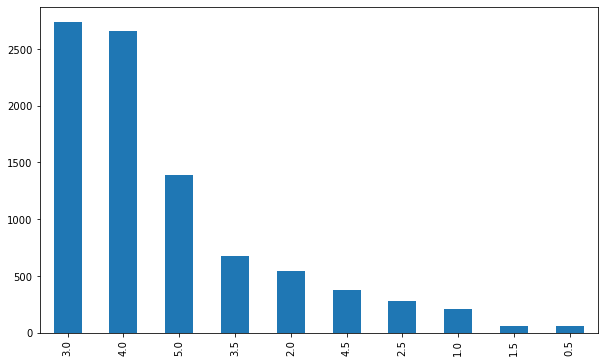

In [6]:
plt.figure(figsize=(10,6))
data['rating'].value_counts().plot(kind='bar')

In [7]:
#number of unique users in the dataset
len(data.userId.unique())

4081

In [8]:
len(data.movie.unique())

10

In [9]:
data.movie.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [7]:
user_movies_df = data.pivot(index='userId',columns = 'movie', values = 'rating')
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [8]:
# Imputing the Null values with '0'
user_movies_df.fillna(0, inplace=True)
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [9]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [10]:
user_sim = 1 - pairwise_distances(user_movies_df.values, metric = 'cosine')
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [11]:
# Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [15]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [17]:
# Set the index and column name to user Ids
user_sim_df.index = list(user_movies_df.index)
user_sim_df.columns = list(user_movies_df.index)
user_sim_df

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7116,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7117,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7119,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [18]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,1,2,3,4,5
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0


In [18]:
user_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [33]:
user_sim_df.sort_values([8], ascending=False).head(100)

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
4831,0.000000,0.555136,0.555136,0.618580,0.000000,0.578181,0.392541,0.995703,0.555136,0.716360,...,0.475831,0.555136,0.000000,0.392541,0.616849,0.000000,0.417782,0.900596,0.555136,0.345596
614,0.000000,0.520266,0.520266,0.676346,0.000000,0.541863,0.367884,0.992625,0.520266,0.707458,...,0.520266,0.520266,0.000000,0.367884,0.674453,0.000000,0.391540,0.905125,0.520266,0.323888
2274,0.000000,0.482418,0.422116,0.759809,0.000000,0.463191,0.341121,0.972373,0.422116,0.632564,...,0.542720,0.422116,0.000000,0.298481,0.767523,0.000000,0.317675,0.913063,0.422116,0.262785
5043,0.000000,0.420589,0.600842,0.672943,0.000000,0.555383,0.297402,0.968856,0.600842,0.758666,...,0.480673,0.600842,0.000000,0.424859,0.679775,0.000000,0.452180,0.909761,0.600842,0.374050
5843,0.000000,0.380235,0.633724,0.671748,0.000000,0.561026,0.268866,0.959475,0.633724,0.800186,...,0.506979,0.633724,0.000000,0.448111,0.672166,0.000000,0.476926,0.894126,0.633724,0.394521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,0.000000,0.404226,0.646762,0.388057,0.000000,0.578883,0.285831,0.806060,0.646762,0.565371,...,0.000000,0.646762,0.000000,0.457330,0.457330,0.000000,0.486738,0.853169,0.646762,0.402637
188,0.000000,0.218218,0.654654,0.567367,0.000000,0.511372,0.154303,0.805823,0.654654,0.678246,...,0.218218,0.654654,0.000000,0.462910,0.617213,0.218218,0.636375,0.851064,0.654654,0.407550
2140,0.000000,0.512148,0.512148,0.384111,0.000000,0.533407,0.362143,0.803773,0.512148,0.447697,...,0.000000,0.512148,0.000000,0.362143,0.452679,0.256074,0.554056,0.837150,0.512148,0.318834
271,0.435194,0.609272,0.261116,0.487417,0.435194,0.407934,0.430820,0.803530,0.261116,0.524145,...,0.609272,0.261116,0.435194,0.492366,0.430820,0.000000,0.196510,0.609026,0.261116,0.403380


In [19]:
user_id_eight = user_sim_df.sort_values([8], ascending=False).head(100)
user_id_eight[8]

4831    0.995703
614     0.992625
2274    0.972373
5043    0.968856
5843    0.959475
          ...   
6636    0.806060
188     0.805823
2140    0.803773
271     0.803530
2261    0.802277
Name: 8, Length: 100, dtype: float64

In [20]:
# Most Similar Users
user_sim_df.idxmax(axis=1)

1          5
2        112
3         10
4       2577
5          1
        ... 
7115      30
7116    1163
7117     427
7119       3
7120    6020
Length: 4081, dtype: int64

In [22]:
user_sim_df.idxmax(axis=1)[:12]

1        5
2      112
3       10
4     2577
5        1
6     4194
7     3745
8     4831
10       3
11    2330
12    1955
13    1338
dtype: int64

In [22]:
data[(data['userId']==8) | (data['userId']==4831)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
1766,4831,Toy Story (1995),3.5
3727,8,Grumpier Old Men (1995),5.0
4200,4831,Grumpier Old Men (1995),3.5
5205,8,Heat (1995),3.0
6066,4831,Heat (1995),2.5
7445,8,GoldenEye (1995),4.0
8526,4831,GoldenEye (1995),3.0


In [27]:
def give_reco(customer_id):
    tem = list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(data[data['userId']==i]['movie'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(data[data['userId']==customer_id]['movie'])

In [25]:
give_reco(11)

{'Heat (1995)', 'Jumanji (1995)', 'Waiting to Exhale (1995)'}

In [ ]:
def give_reco(customer_id):
    tem = list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(data[data['userId']==i]['movie'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(data[data['userId']==customer_id]['movie'])